In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [3]:
netflix_data = pd.read_csv("https://raw.githubusercontent.com/benvictoria17/DataAnalytics/main/dataset/Netflix%20Movies%20and%20TV%20Shows/netflix_titles_nov_2019.csv")
netflix_data.head()

,show_id,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,type
0,81193313,Chocolate,NaN,"Ha Ji-won, Yoon Kye-sang, Jang Seung-jo, Kang ...",South Korea,"November 30, 2019",2019,TV-14,1 Season,"International TV Shows, Korean TV Shows, Roman...",Brought together by meaningful meals in the pa...,TV Show
1,81197050,Guatemala: Heart of the Mayan World,"Luis Ara, Ignacio Jaunsolo",Christian Morales,NaN,"November 30, 2019",2019,TV-G,67 min,"Documentaries, International Movies","From Sierra de las Minas to Esquipulas, explor...",Movie
2,81213894,The Zoya Factor,Abhishek Sharma,"Sonam Kapoor, Dulquer Salmaan, Sanjay Kapoor, ...",India,"November 30, 2019",2019,TV-14,135 min,"Comedies, Dramas, International Movies",A goofy copywriter unwittingly convinces the I...,Movie
3,81082007,Atlantics,Mati Diop,"Mama Sane, Amadou Mbow, Ibrahima Traore, Nicol...","France, Senegal, Belgium","November 29, 2019",2019,TV-14,106 min,"Dramas, Independent Movies, International Movies","Arranged to marry a rich man, young Ada is cru...",Movie
4,80213643,Chip and Potato,NaN,"Abigail Oliver, Andrea Libman, Briana Buckmast...","Canada, United Kingdom",NaN,2019,TV-Y,2 Seasons,Kids' TV,"Lovable pug Chip starts kindergarten, makes ne...",TV Show


In [4]:
netflix_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5837 entries, 0 to 5836
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       5837 non-null   int64 
 1   title         5837 non-null   object
 2   director      3936 non-null   object
 3   cast          5281 non-null   object
 4   country       5410 non-null   object
 5   date_added    5195 non-null   object
 6   release_year  5837 non-null   int64 
 7   rating        5827 non-null   object
 8   duration      5837 non-null   object
 9   listed_in     5837 non-null   object
 10  description   5837 non-null   object
 11  type          5837 non-null   object
dtypes: int64(2), object(10)
memory usage: 547.3+ KB


In [5]:
netflix_shows=netflix_data[netflix_data['type']=='TV Show']
netflix_movies=netflix_data[netflix_data['type']=='Movie']

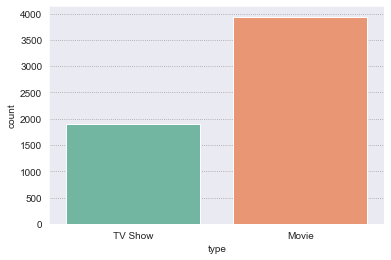

In [6]:
sns.set_style("darkgrid", {"grid.color": ".6", "grid.linestyle": ":"})
ax = sns.countplot(x="type", data=netflix_data, palette="Set2")

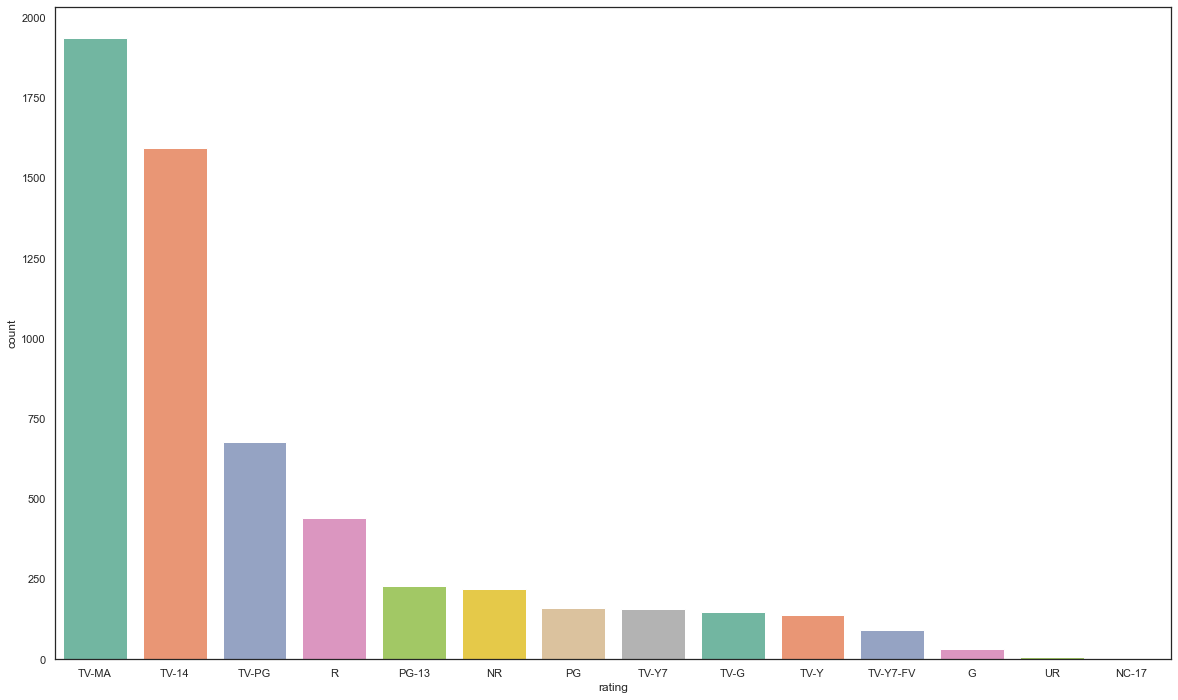

In [7]:
plt.figure(figsize=(20,12))
sns.set(style="white")
ax = sns.countplot(x="rating", data=netflix_data, palette="Set2", order=netflix_data['rating'].value_counts().index[0:15])

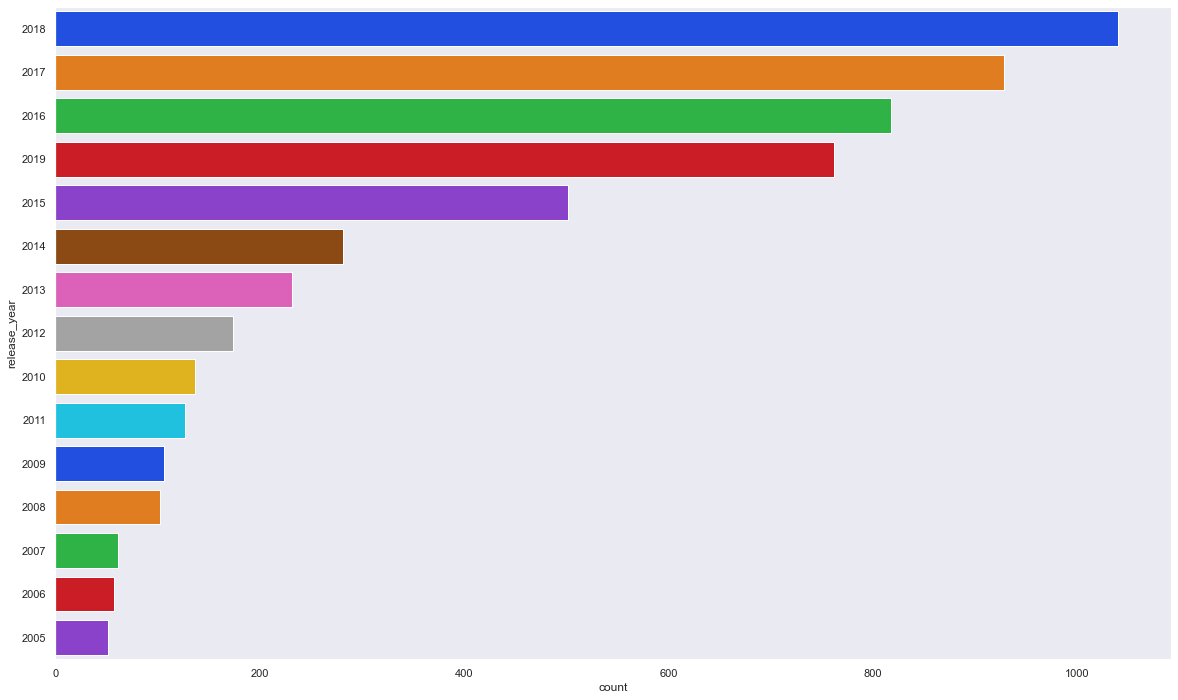

In [8]:
plt.figure(figsize=(20,12))
sns.set(style="dark")
ax = sns.countplot(y="release_year", data=netflix_data, palette="bright", order=netflix_data['release_year'].value_counts().index[0:15])

In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(stop_words='english')
netflix_data['description'] = netflix_data['description'].fillna('')
tfidf_matrix = tfidf.fit_transform(netflix_data['description'])
tfidf_matrix.shape

(5837, 15651)

In [10]:
from sklearn.metrics.pairwise import linear_kernel
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)
indices = pd.Series(netflix_data.index, index=netflix_data['title']).drop_duplicates()

In [11]:
def get_recommendations(title, cosine_sim=cosine_sim):
    idx = indices[title]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:11]
    movie_indices = [i[0] for i in sim_scores]
    return netflix_data['title'].iloc[movie_indices]

In [13]:
get_recommendations("Peaky Blinders")

620                     Our Godfather
4933                         The Fear
4069                       The Prison
5477    Jonathan Strange & Mr Norrell
5676                Power Rangers Zeo
3846                       The Tudors
1305      Once Upon a Time in Mumbaai
3350                    Pocoyo & Cars
1579     The Legend of Michael Mishra
2377                             Dogs
Name: title, dtype: object

In [14]:
get_recommendations("Dark")

3753                Altered Carbon
2734                        Maniac
1847                     Candyflip
2160    Black Mirror: Bandersnatch
1389                Kia and Cosmos
2649                  Jagga Jasoos
2521                      Shirkers
3345                     Love Rain
1050                         ANIMA
2018                       Skyline
Name: title, dtype: object

In [15]:
missingfilled=netflix_data.fillna('')
missingfilled.head(2)

,show_id,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,type
0,81193313,Chocolate,,"Ha Ji-won, Yoon Kye-sang, Jang Seung-jo, Kang ...",South Korea,"November 30, 2019",2019,TV-14,1 Season,"International TV Shows, Korean TV Shows, Roman...",Brought together by meaningful meals in the pa...,TV Show
1,81197050,Guatemala: Heart of the Mayan World,"Luis Ara, Ignacio Jaunsolo",Christian Morales,,"November 30, 2019",2019,TV-G,67 min,"Documentaries, International Movies","From Sierra de las Minas to Esquipulas, explor...",Movie


In [16]:
def data_cleaning(x):
        return str.lower(x.replace(" ", ""))

In [17]:
features=['title','director','cast','listed_in','description']
missingfilled=missingfilled[features]
for feature in features:
    missingfilled[feature] = missingfilled[feature].apply(data_cleaning)
    
missingfilled.head(2)

,title,director,cast,listed_in,description
0,chocolate,,"haji-won,yoonkye-sang,jangseung-jo,kangbu-ja,l...","internationaltvshows,koreantvshows,romantictvs...",broughttogetherbymeaningfulmealsinthepastandpr...
1,guatemala:heartofthemayanworld,"luisara,ignaciojaunsolo",christianmorales,"documentaries,internationalmovies","fromsierradelasminastoesquipulas,exploreguatem..."


In [18]:
def content_include(x):
    return x['title']+ ' ' + x['director'] + ' ' + x['cast'] + ' ' +x['listed_in']+' '+ x['description']
missingfilled['soup'] = missingfilled.apply(content_include, axis=1)

In [19]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
countvec = CountVectorizer(stop_words='english')
countvec_matrix = countvec.fit_transform(missingfilled['soup'])

cosine_sim2 = cosine_similarity(countvec_matrix, countvec_matrix)
missingfilled=missingfilled.reset_index()
indices = pd.Series(missingfilled.index, index=missingfilled['title'])
def get_recommendations_new(title, cosine_sim=cosine_sim):
    title=title.replace(' ','').lower()
    idx = indices[title]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:11]
    movie_indices = [i[0] for i in sim_scores]
    return netflix_data['title'].iloc[movie_indices]
get_recommendations_new('Dark', cosine_sim2)

2262                      Wanted
763                     Sintonia
4444                     Persona
1118                     Unit 42
2571                 Black Heart
4592           The Truth Seekers
1223              Killer Ratings
2522       Terrorism Close Calls
2839    Inside the Criminal Mind
1355                  The Writer
Name: title, dtype: object

In [20]:
get_recommendations_new('Peaky Blinders', cosine_sim2)

3708                   The Frankenstein Chronicles
4937                         The Murder Detectives
3484                                        Loaded
2529                                     Bodyguard
3189                                 Kiss Me First
5612                                  Happy Valley
1223                                Killer Ratings
2522                         Terrorism Close Calls
2756    How to Live Mortgage Free with Sarah Beeny
2839                      Inside the Criminal Mind
Name: title, dtype: object

In [21]:
get_recommendations_new('Black Mirror', cosine_sim2)

687            The Dark Crystal: Age of Resistance
2184                                Watership Down
2756    How to Live Mortgage Free with Sarah Beeny
4518                                         Vexed
356                        Interior Design Masters
922                       Ainsley Eats the Streets
2693                       Three Wives One Husband
2757                         Inside The Freemasons
3065                             Amazing Interiors
3939                   The Real Football Factories
Name: title, dtype: object